# 오픈 API를 이용한 웹페이지 크롤링

### 오픈 API란?

- 크롤링은 하면 웹사이트에 과부하가 생기므로 이를 방지하는 차원에서 크롤링을 막는 경우가 있음
- 오픈 API를 사용하여 원하는 정보를 얻을 수 있게 도와 줌

- API : Application Programming Interface
    - 사전적정의 : 운영체제나 프로그래밍 언어가 제공하는 기능을 응용프로그램에서 사용 또는 제어할 수 있도록 만든 인터페이스

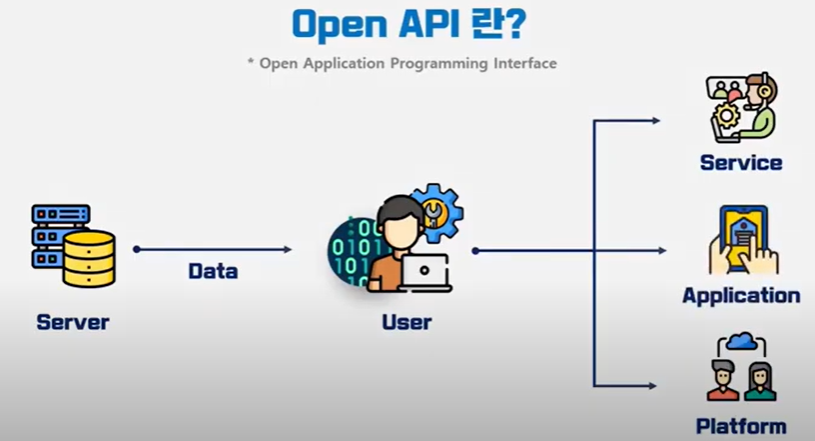

*출처: 공공데이터활용지원센터, https://www.youtube.com/watch?v=pe5-RQb-OPI

### 데이터 수집 API

- 공공데이터포털
    - http://data.go.kr
    - 행정안전부
    - 국가 기관에서 보유한 다양한 데이터들을 개방
    - 데이터파일, Open API, 오픈API 등의 형식으로 데이터 제공
- AI Hub
    - https://www.aihub.or.kr/
    - 과학기술정보통신부 & 한국지능정보사회진흥원
    - AI 학습을 위한 다양한 분야의 비정형 데이터 제공
- 문화공공데이터광장
    - https://www.culture.go.kr/data/main/main.do
    - 문화체육관광부
    - 문화예술, 문화산업, 문화유산, 체육, 관광 등의 데이터 제공
- 공간정보 오픈플랫폼(브이월드)
    - https://www.vworld.kr/v4po_main.do
    - 국토교통부
    - 지도 자료 제공
- 전자공시 OPENDART 시스템
    - https://opendart.fss.or.kr/
    - 금융감독원
    - DART에 공시되고 있는 상장기업의 공시보고서(사업보고서, 재무재표 등 투자 판단에 영향을 줄 수 있는 정보)
- 서울열린데이터광장
    - https://data.seoul.go.kr/
    - 서울시
- 한국은행 ECOS OpenAPI 서비스
    - https://ecos.bok.or.kr/api/#/
    - 금융 관련 데이터
- 식품안전나라 공공데이터
    - https://www.foodsafetykorea.go.kr/apiMain.do
    - 식품의약품안전처
- 국방부 공공데이터포털
    - https://data.mnd.go.kr/mbshome/mbs/data/
    - 병무청, 국방부 제공 데이

#### 공공데이터 포털의 오픈API 사용과정

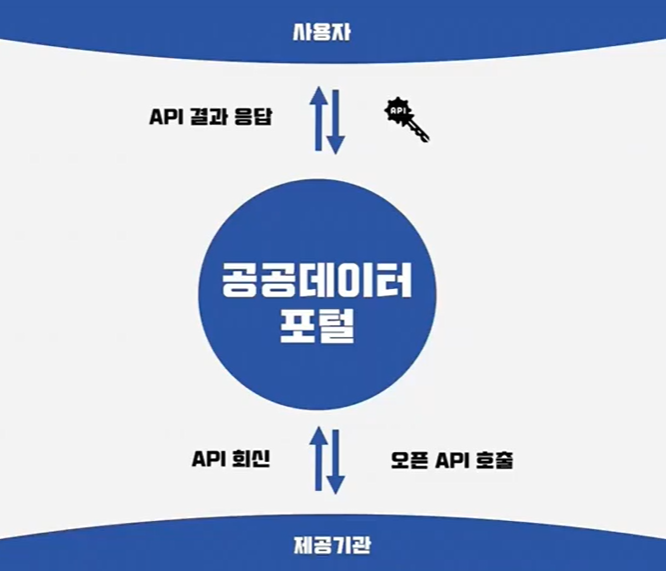

### #1.  공공데이터 포털사이트에서 API 활용 신청

1) 회원가입 : 오픈 API 사용을 위해 회원가입
2) 로그인
3) 이용하려는 데이터 검색
   - 예. data.go.kr 검색란에서 '코로나19 시도 발생현황' 입력

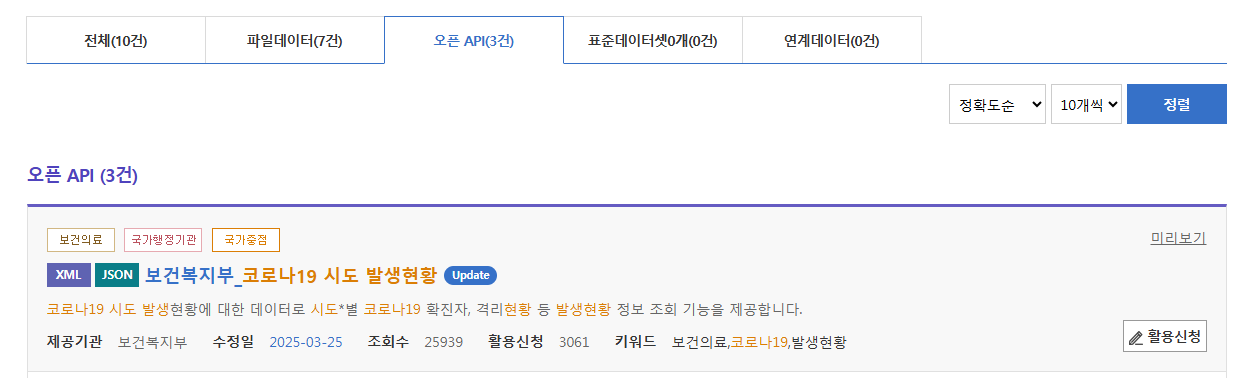

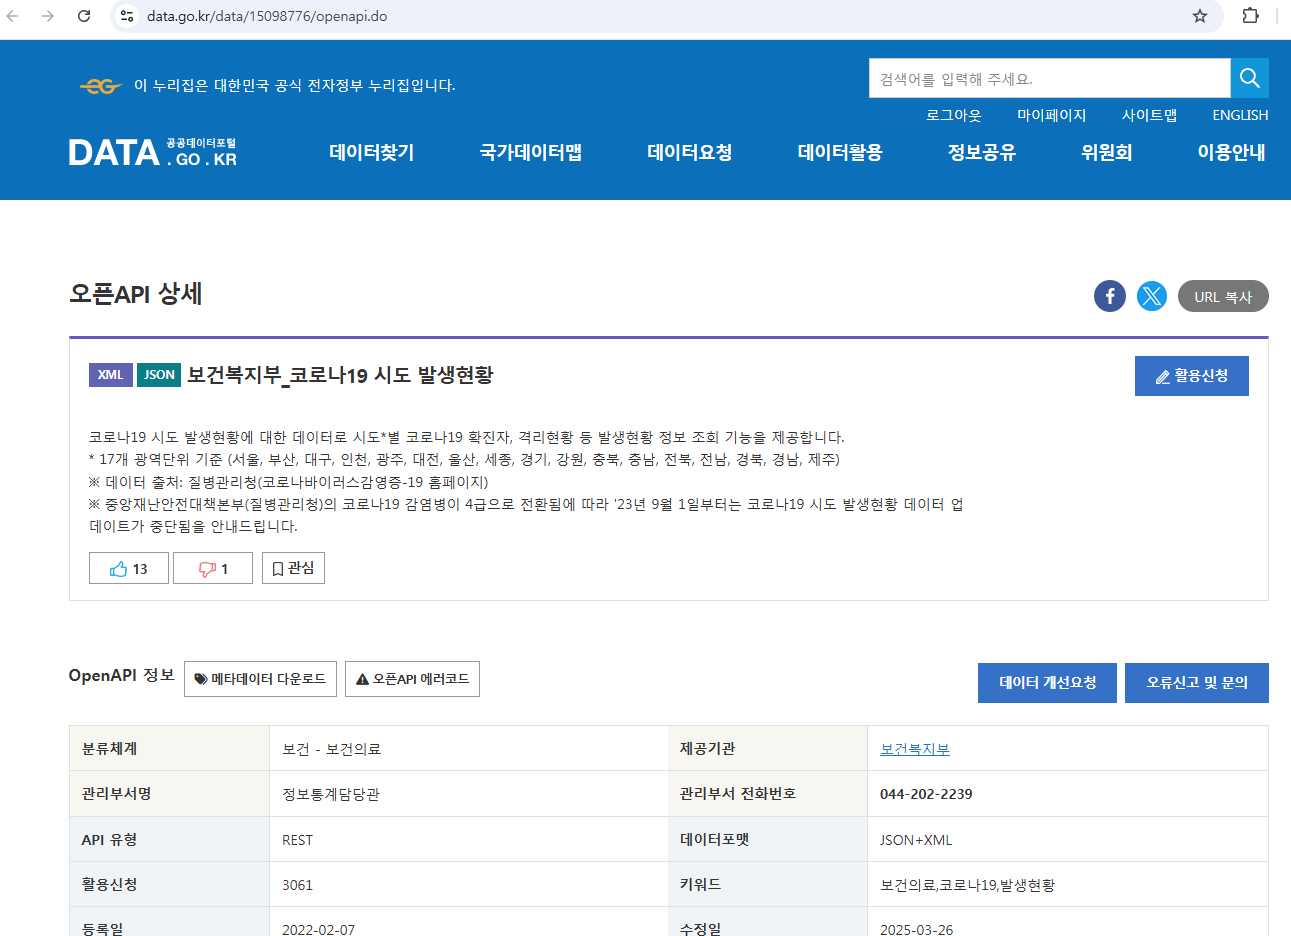

4. 검색 결과 중 [오픈API]에서 **'보건복지부_코로나19 시도 발생현황'** 선택한 후 **<활용신청>** 버튼을 클릭

5. 활용신청 페이지에서 **활용목적을 입력**하고 **'동의합니다'체크** 후 **<활용신청>버튼** 클릭

6. [마이페이지]로 이동하여 **[오픈API]-[인증키 발급현황]** 메뉴 클릭
    - API를 사용하기 위해 필요한 인증키임

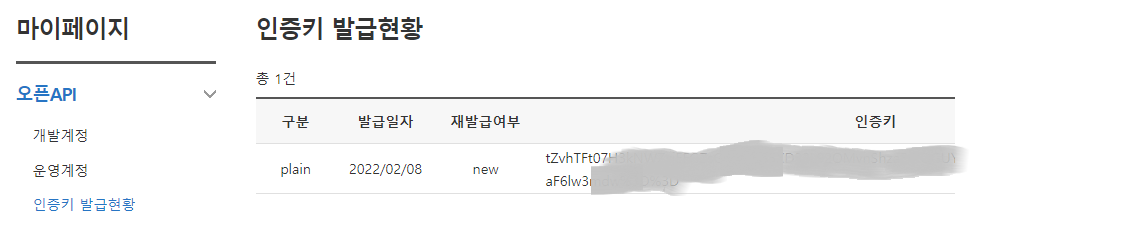

7. [마이페이지]로 이동하여 승인된 목록에서 **[보건복지부_코로나19 시도 발생현황]** 클릭 후 **서비스 정보** 확인

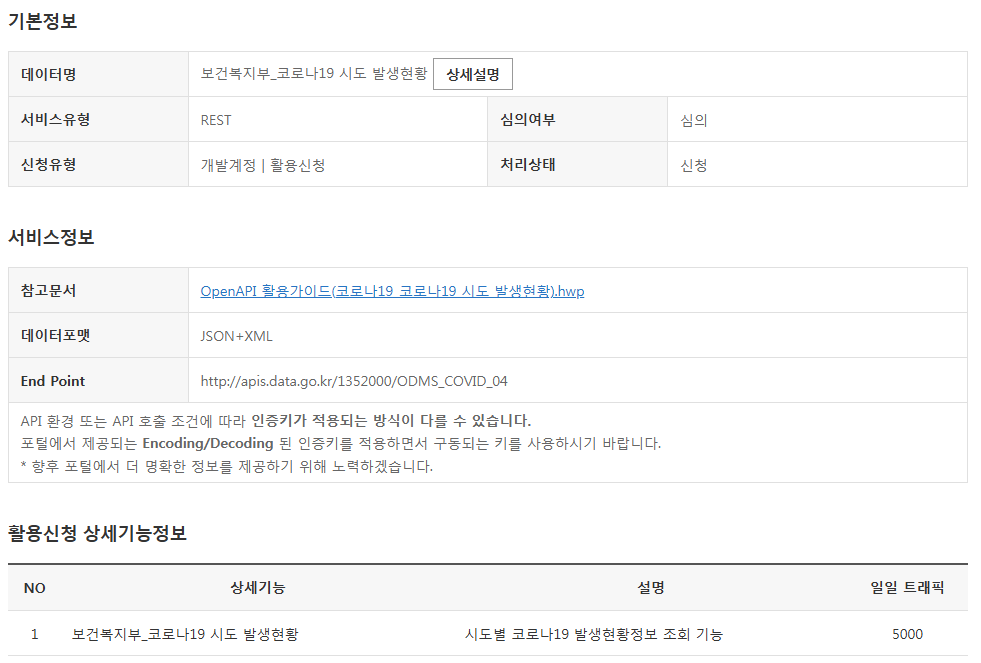
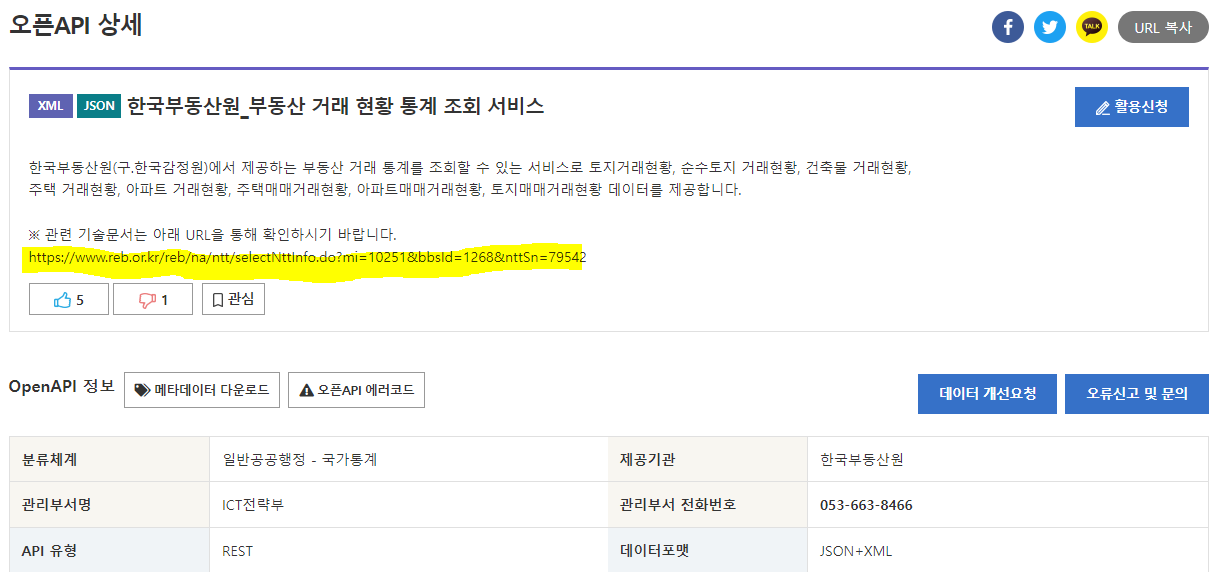

8. **[기본정보]** 의 **<상세설명>** 버튼을 클릭하여 '보건복지부_코로나19 시도 발생현황' 상세페이지로 이동

9. **참고문서**를 웹페이지에 입력하여 해당 문서를 다운로드함

--------

### 2. API 사용하기

#### 실습예제1.  '국토교통부_아파트 매매 실거래가 상세 자료' 데이터 크롤링

https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15126468

##### 1) [국토교통부_아파트 매매 실거래가 상세 자료] 기술문서를 참고하여 api 요청/응답 테스트

- 요청메세지 예제 코드를 복사하여 웹브라우저 주소창에 넣고 서비스 키를 뒤에 붙여 클릭하여 응답 메시지 결과대로 나오는지 확인

In [4]:
serviceKey = '3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D'
url = f'https://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/getRTMSDataSvcAptTradeDev?LAWD_CD=11110&DEAL_YMD=201512&serviceKey={serviceKey}&pageNo=1&numOfRows=10'
url

'https://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/getRTMSDataSvcAptTradeDev?LAWD_CD=11110&DEAL_YMD=201512&serviceKey=3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D&pageNo=1&numOfRows=10'

##### 2) 수집하려는 데이터의 입력매개변수와 값을 확인하여 api 요청 url 작성

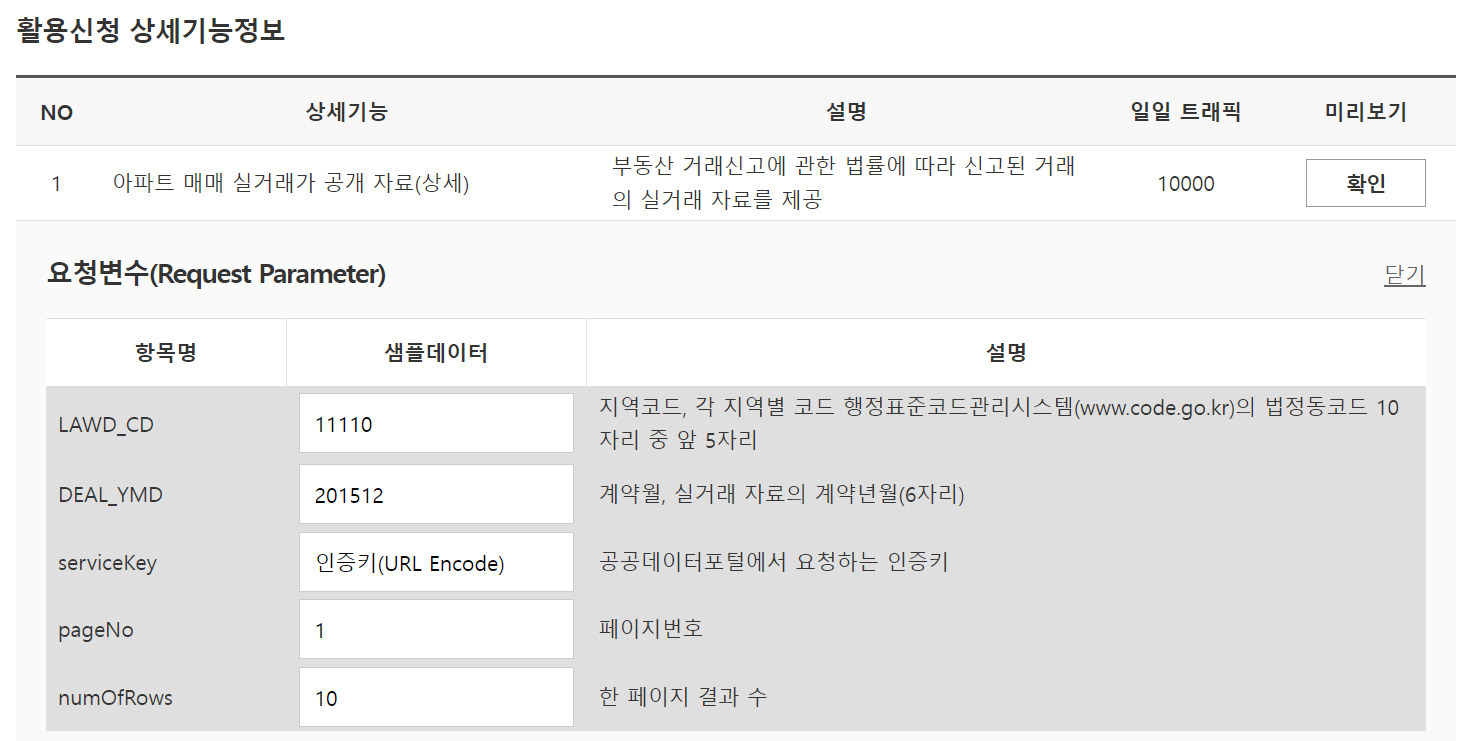

##### 3) BeautifulSoup을 이용한 크롤링

- 계약연월(2024년7월)기준 아파트매매 실거래가조회
- API 요청 준비 : 파리미터와 서비스 키 정보 설정

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [39]:
baseurl = 'https://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/'   # SSL
baseurl2 = 'http://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/'
service = 'getRTMSDataSvcAptTradeDev?'
LAWD_CD = '11110'
DEAL_YMD = '201512'
serviceKey = '3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D'
pageNo = '1'
numOfRows = '10'

In [44]:
params = 'LAWD_CD=' + LAWD_CD + '&' \
        + 'DEAL_YMD=' + DEAL_YMD + '&' \
        + 'serviceKey=' + serviceKey + '&' \
        + 'pageNo=' + pageNo + '&' \
        + 'numOfRows=' + numOfRows
url = baseurl2 + service + params
url

'http://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/getRTMSDataSvcAptTradeDev?LAWD_CD=11110&DEAL_YMD=201512&serviceKey=3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D&pageNo=1&numOfRows=10'

In [45]:
url1 = baseurl + service
params_dict= {
'LAWD_CD' : LAWD_CD,
'DEAL_YMD' : DEAL_YMD,
'serviceKey' : serviceKey,
'pageNo' : pageNo,
'numOfRows' : numOfRows
}

- API 서비스 페이지 요청

In [46]:
xml = requests.get(url).text

In [10]:
# httpx 모듈을 이용한 요청 (SSLError 발생시)
# !pip install httpx

In [16]:
# !pip install h2

In [11]:
import httpx

with httpx.Client(verify=False, http2=True) as client:
    res = client.get(url, params=params_dict)
    xml = res.text

- xml 파싱 : BeautifulSoup 이용

In [20]:
# !pip install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 57.3 MB/s eta 0:00:00


In [21]:
# !pip install html5lib

In [16]:
soup = BeautifulSoup(xml, 'xml')

In [21]:
# soup

- 첫번째 item 태그의 데이터 추출

In [259]:
soup.item
soup.find('item')
soup.find_all('item')

[<item>
 <deathCnt>1418</deathCnt>
 <defCnt>190332</defCnt>
 <gubun>서울</gubun>
 <gubunCn>首尔</gubunCn>
 <gubunEn>Seoul</gubunEn>
 <incDec>3166</incDec>
 <isolClearCnt>148142</isolClearCnt>
 <isolIngCnt>0</isolIngCnt>
 <localOccCnt>3157</localOccCnt>
 <overFlowCnt>9</overFlowCnt>
 <qurRate>1969</qurRate>
 <stdDay>2021-12-15</stdDay>
 </item>]

In [20]:
len(soup.find_all('item'))

10

- item 태그 하나에 들어있는 정보를 딕셔너리로 저장

In [27]:
data = {}
for tag in item.find_all():
    data[tag.name] = tag.text.strip() if tag.text else None
data

{'aptDong': '',
 'aptNm': '인왕산2차아이파크',
 'aptSeq': '11110-2417',
 'bonbun': '0088',
 'bubun': '0000',
 'buildYear': '2015',
 'buyerGbn': '',
 'cdealDay': '',
 'cdealType': '',
 'dealAmount': '63,400',
 'dealDay': '22',
 'dealMonth': '12',
 'dealYear': '2015',
 'dealingGbn': '',
 'estateAgentSggNm': '',
 'excluUseAr': '84.0284',
 'floor': '10',
 'jibun': '88',
 'landCd': '1',
 'landLeaseholdGbn': 'N',
 'rgstDate': '',
 'roadNm': '통일로18길',
 'roadNmBonbun': '00034',
 'roadNmBubun': '00000',
 'roadNmCd': '4100482',
 'roadNmSeq': '01',
 'roadNmSggCd': '11110',
 'roadNmbCd': '0',
 'sggCd': '11110',
 'slerGbn': '',
 'umdCd': '18700',
 'umdNm': '무악동'}

In [28]:
df = pd.DataFrame([data])
df

,aptDong,aptNm,aptSeq,bonbun,bubun,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,...,roadNmBonbun,roadNmBubun,roadNmCd,roadNmSeq,roadNmSggCd,roadNmbCd,sggCd,slerGbn,umdCd,umdNm
0,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   aptDong           1 non-null      object
 1   aptNm             1 non-null      object
 2   aptSeq            1 non-null      object
 3   bonbun            1 non-null      object
 4   bubun             1 non-null      object
 5   buildYear         1 non-null      object
 6   buyerGbn          1 non-null      object
 7   cdealDay          1 non-null      object
 8   cdealType         1 non-null      object
 9   dealAmount        1 non-null      object
 10  dealDay           1 non-null      object
 11  dealMonth         1 non-null      object
 12  dealYear          1 non-null      object
 13  dealingGbn        1 non-null      object
 14  estateAgentSggNm  1 non-null      object
 15  excluUseAr        1 non-null      object
 16  floor             1 non-null      object
 17  jibun             1 

In [36]:
print(list(df.columns))

['aptDong', 'aptNm', 'aptSeq', 'bonbun', 'bubun', 'buildYear', 'buyerGbn', 'cdealDay', 'cdealType', 'dealAmount', 'dealDay', 'dealMonth', 'dealYear', 'dealingGbn', 'estateAgentSggNm', 'excluUseAr', 'floor', 'jibun', 'landCd', 'landLeaseholdGbn', 'rgstDate', 'roadNm', 'roadNmBonbun', 'roadNmBubun', 'roadNmCd', 'roadNmSeq', 'roadNmSggCd', 'roadNmbCd', 'sggCd', 'slerGbn', 'umdCd', 'umdNm']


- item 태그 하나에 들어있는 정보를 딕셔너리로 저장하는 함수 작성

In [31]:
def to_extract_row(item):
    data = {}
    for tag in soup.item.find_all():
        data[tag.name] = tag.text.strip() if tag.text else None
    return data

In [53]:
tag_names = ['umdNm', 'aptNm', 'aptDong', 'excluUseAr','buildYear','dealAmount', 'dealYear', 'dealMonth', 'dealDay']
col_names = ['법정동', '아파트', '동명', '전용면적', '건축년도', '거래금액(만원)', '계약연도', '계약월', '계약일']

# 딕셔너리 형식으로 데이터 생성하는 함수(item, 태그명, 컬럼명)
def to_extract_row_col(item, tag_names, col_names=None):
    data = {}
    if col_names is None:
        col_names = tag_names
    for tag, col in zip(tag_names, col_names):
        data[col] = item.find(tag).text.strip() if item.find(tag) else None
    return data

In [55]:
items = soup.find_all('item')
to_extract_row_col(items[0], tag_names, col_names), to_extract_row_col(items[0], tag_names)

({'법정동': '무악동',
  '아파트': '인왕산2차아이파크',
  '동명': '',
  '전용면적': '84.0284',
  '건축년도': '2015',
  '거래금액(만원)': '63,400',
  '계약연도': '2015',
  '계약월': '12',
  '계약일': '22'},
 {'umdNm': '무악동',
  'aptNm': '인왕산2차아이파크',
  'aptDong': '',
  'excluUseAr': '84.0284',
  'buildYear': '2015',
  'dealAmount': '63,400',
  'dealYear': '2015',
  'dealMonth': '12',
  'dealDay': '22'})

- 조회한 아파트거래 전체 데이터를 읽고 데이터프레임으로 저장

In [67]:
def to_extract_row_all(item, tag_names=None, col_names=None):
    pass

In [64]:
dataList = [to_extract_row_col(item, tag_names, col_names) for item in soup.find_all('item')]

df2 = pd.DataFrame(dataList)
df2

,법정동,아파트,동명,전용면적,건축년도,거래금액(만원),계약연도,계약월,계약일
0,무악동,인왕산2차아이파크,,84.0284,2015,"63,400",2015,12,22
1,명륜1가,렉스빌,,106.98,2006,"57,000",2015,12,29
2,교북동,동아,,84.28,1995,"44,600",2015,12,7
3,내수동,경희궁파크팰리스,,146.33,2003,"120,000",2015,12,24
4,창신동,두산,,84.9,1999,"50,000",2015,12,24
5,사직동,광화문스페이스본(101동~105동),,94.51,2008,"82,500",2015,12,10
6,숭인동,익성씨티하임,,15.76,2013,"10,500",2015,12,15
7,숭인동,종로센트레빌,,84.92,2008,"52,300",2015,12,26
8,창신동,창신쌍용1,,79.87,1992,"37,300",2015,12,23
9,창신동,창신쌍용1,,106.62,1992,"42,800",2015,12,22


In [65]:
dataList = [to_extract_row(item) for item in soup.find_all('item')]

df3 = pd.DataFrame(dataList)
df3

,aptDong,aptNm,aptSeq,bonbun,bubun,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,...,roadNmBonbun,roadNmBubun,roadNmCd,roadNmSeq,roadNmSggCd,roadNmbCd,sggCd,slerGbn,umdCd,umdNm
0,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
1,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
2,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
3,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
4,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
5,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
6,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
7,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
8,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동
9,,인왕산2차아이파크,11110-2417,0088,0000,2015,,,,"63,400",...,00034,00000,4100482,01,11110,0,11110,,18700,무악동


--------------------------------------------------

#### 데이터 수집 함수 작성

In [74]:
import httpx
import requests

# LAWD_CD = '11110'
# DEAL_YMD = '201512'
# pageNo = '1'
# numOfRows = '10'

def requests_estate_data(LAWD_CD='11110', DEAL_YMD='202412', pageNo='1', numOfRows='10'):
    baseurl = 'http://apis.data.go.kr/1613000/RTMSDataSvcAptTradeDev/getRTMSDataSvcAptTradeDev?'
    serviceKey = '3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D'
    params = 'LAWD_CD=' + LAWD_CD + '&' \
            + 'DEAL_YMD=' + DEAL_YMD + '&' \
            + 'serviceKey=' + serviceKey + '&' \
            + 'pageNo=' + pageNo + '&' \
            + 'numOfRows=' + numOfRows
    url = baseurl + params'3RMvO%2Bfsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA%3D%3D'
    response = requests.get(url)
    xml = response.text
    print(response)
    soup = BeautifulSoup(xml, 'xml')
    return soup

In [87]:
soup = requests_estate_data(LAWD_CD='11440')

<Response [200]>


In [84]:
soup.item # 마포구

<item><aptDong> </aptDong><aptNm>현대</aptNm><aptSeq>11440-124</aptSeq><bonbun>0040</bonbun><bubun>0012</bubun><buildYear>2000</buildYear><buyerGbn>개인</buyerGbn><cdealDay> </cdealDay><cdealType> </cdealType><dealAmount>71,500</dealAmount><dealDay>19</dealDay><dealMonth>12</dealMonth><dealYear>2024</dealYear><dealingGbn>중개거래</dealingGbn><estateAgentSggNm>서울 마포구</estateAgentSggNm><excluUseAr>59.55</excluUseAr><floor>6</floor><jibun>40-12</jibun><landCd>1</landCd><landLeaseholdGbn>N</landLeaseholdGbn><rgstDate> </rgstDate><roadNm>성암로7길</roadNm><roadNmBonbun>00003</roadNmBonbun><roadNmBubun>00000</roadNmBubun><roadNmCd>4139346</roadNmCd><roadNmSeq>02</roadNmSeq><roadNmSggCd>11440</roadNmSggCd><roadNmbCd>0</roadNmbCd><sggCd>11440</sggCd><slerGbn>개인</slerGbn><umdCd>12600</umdCd><umdNm>중동</umdNm></item>

In [ ]:
# https 모듈을 이용한 요청
# url2 = baseurl
# params_dict= {
# 'LAWD_CD' : LAWD_CD,
# 'DEAL_YMD' : DEAL_YMD,
# 'serviceKey' : serviceKey,
# 'pageNo' : pageNo,
# 'numOfRows' : numOfRows
# }

# with httpx.Client(verify=False, http2=True) as client:
#     res = client.get(url, params=params_dict)
#     xml = res.text

"\n# https 모듈을 이용한 요청\nurl2 = baseurl\nparams_dict= {\n'LAWD_CD' : LAWD_CD,\n'DEAL_YMD' : DEAL_YMD,\n'serviceKey' : serviceKey,\n'pageNo' : pageNo,\n'numOfRows' : numOfRows\n}\n\nwith httpx.Client(verify=False, http2=True) as client:\n    res = client.get(url, params=params_dict)\n    xml = res.text\n"

In [88]:
def make_df(soup):
    dataList = [to_extract_row_col(item, tag_names, col_names) for item in soup.find_all('item')]
    return pd.DataFrame(dataList)

make_df(soup)

,법정동,아파트,동명,전용면적,건축년도,거래금액(만원),계약연도,계약월,계약일
0,중동,현대,,59.55,2000,"71,500",2024,12,19
1,상암동,상암월드컵파크7단지,701,84.67,2005,"115,500",2024,12,27
2,염리동,마포프레스티지자이,,59.8981,2021,"169,000",2024,12,20
3,상암동,상암월드컵파크4단지,403,84.66,2006,"129,500",2024,12,31
4,상암동,상암월드컵파크2단지,207,59.92,2003,"99,800",2024,12,31
5,상암동,상암월드컵파크7단지,701,84.67,2005,"115,500",2024,12,27
6,염리동,마포프레스티지자이,109,59.8772,2021,"177,500",2024,12,31
7,상수동,래미안밤섬리베뉴Ⅰ,101,84.99,2014,"172,000",2024,12,25
8,창전동,서강예가,101,59.983,2007,"131,500",2024,12,26
9,성산동,성산시영(유원),,59.43,1986,"110,000",2024,12,31


### 연습문제. 코로나19 데이터 수집

https://www.data.go.kr/data/15098776/openapi.do

In [206]:
url = 'http://apis.data.go.kr/1352000/ODMS_COVID_04/callCovid04Api'
params ={'serviceKey' : '3RMvO+fsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA==', 
         'pageNo' : '1', 
         'numOfRows' : '500', 
         'apiType' : 'xml', 
         'std_day' : '2021-12-15', 
         'gubun' : '서울'}

response = requests.get(url, params=params)
xml = response.text
print(xml)

<?xml version="1.0" encoding="UTF-8"?>
<response>
 <header>
  <resultCode>00</resultCode>
  <resultMsg>NORMAL SERVICE</resultMsg>
 </header>
 <body>
  <items>
   <item>
    <deathCnt>1418</deathCnt>
    <defCnt>190332</defCnt>
    <gubun>서울</gubun>
    <gubunCn>首尔</gubunCn>
    <gubunEn>Seoul</gubunEn>
    <incDec>3166</incDec>
    <isolClearCnt>148142</isolClearCnt>
    <isolIngCnt>0</isolIngCnt>
    <localOccCnt>3157</localOccCnt>
    <overFlowCnt>9</overFlowCnt>
    <qurRate>1969</qurRate>
    <stdDay>2021-12-15</stdDay>
   </item>
  </items>
  <numOfRows>500</numOfRows>
  <pageNo>1</pageNo>
  <totalCount>1</totalCount>
 </body>
</response>




In [251]:
soup = BeautifulSoup(xml, 'xml')
soup.item
# soup.find('item')
soup.find_all('item').name

[<item>
 <deathCnt>1418</deathCnt>
 <defCnt>190332</defCnt>
 <gubun>서울</gubun>
 <gubunCn>首尔</gubunCn>
 <gubunEn>Seoul</gubunEn>
 <incDec>3166</incDec>
 <isolClearCnt>148142</isolClearCnt>
 <isolIngCnt>0</isolIngCnt>
 <localOccCnt>3157</localOccCnt>
 <overFlowCnt>9</overFlowCnt>
 <qurRate>1969</qurRate>
 <stdDay>2021-12-15</stdDay>
 </item>]

In [208]:
data = {}
for tag in soup.item():
    data[tag.name] = tag.text if tag.text else None
data

{'deathCnt': '1418',
 'defCnt': '190332',
 'gubun': '서울',
 'gubunCn': '首尔',
 'gubunEn': 'Seoul',
 'incDec': '3166',
 'isolClearCnt': '148142',
 'isolIngCnt': '0',
 'localOccCnt': '3157',
 'overFlowCnt': '9',
 'qurRate': '1969',
 'stdDay': '2021-12-15'}

In [159]:
import requests
import httpx
import pandas

In [225]:
# 코로나19 데이터 호출 함수
def requests_corona_data(pageNo = '1', numOfRows = '500', apiType = 'xml', std_day = '2021-12-15', gubun = '경기'):
    url = 'http://apis.data.go.kr/1352000/ODMS_COVID_04/callCovid04Api'
    params ={'serviceKey' : '3RMvO+fsdg3VvNyKjt56eKYngjLIhH4s8Cc0tj4KEfxJAzkyWVc2qTNhn65FzlNOfA1yqOmvQmEuRieyxpHfbA==', 
             'pageNo' : pageNo, 
             'numOfRows' : numOfRows, 
             'apiType' : apiType, 
             'std_day' : std_day,
             'gubun' : gubun}
    response = requests.get(url, params=params)
    xml = response.text
    soup = BeautifulSoup(xml, 'xml')
    # print(xml)
    return soup

In [230]:
# 데이터 딕셔너리 함수
def to_extract_row_corona(soup):
    data = {}
    for tag in soup.item():
        data[tag.name] = tag.text if tag.text else None
    return data

In [231]:
soup = requests_corona_data(gubun = '부산')

data = to_extract_row_corona(soup)
df = pd.DataFrame([data])
df

,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,210,19702,부산,釜山,Busan,343,16306,0,343,0,581,2021-12-15


In [213]:
tag_names = ['deathCnt',	'defCnt',	'gubun',	'gubunCn',	'gubunEn',	'incDec',	'isolClearCnt',	'isolIngCnt',	'localOccCnt',	'overFlowCnt',	'qurRate',	'stdDay']
col_names = ['누적확진자수', '시도', '시도_중문', '시도_영문', '전일대비확진자증감수', '누적격리해제수',	'격리중환자수', '지역발생수', '해외유입수',	'만명당발생율',	'자료기준일자',	'기준일자']

In [256]:
# 딕셔너리 형식으로 데이터 생성하는 함수(item, 태그명, 컬럼명)
def to_extract_row_col(soup, tag_names=None, col_names=None):
    data = {}
    if tag_names is None:
        tag_names = [tag.name for tag in soup.find_all()]
    if col_names is None:
        col_names = tag_names
    for tag, col in zip(tag_names, col_names):
        data[col] = soup.find(tag).text if soup.find(tag) else None
    return data

In [257]:
def make_df(soup, tag_names=None, col_names=None):
    dataList = [to_extract_row_col(item, tag_names=tag_names, col_names=col_names) for item in soup.find_all('item')]
    return pd.DataFrame(dataList)

In [262]:
soup = requests_corona_data(gubun = '부산')
make_df(soup, tag_names, col_names)

,누적확진자수,시도,시도_중문,시도_영문,전일대비확진자증감수,누적격리해제수,격리중환자수,지역발생수,해외유입수,만명당발생율,자료기준일자,기준일자
0,210,19702,부산,釜山,Busan,343,16306,0,343,0,581,2021-12-15


---